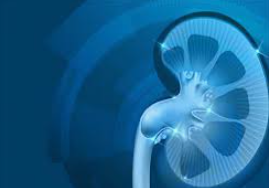

In [17]:
#importing requied libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Loading CSV file

df = pd.read_csv(r'/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [19]:
#Shape of Dataset
df.shape

(400, 26)

    1. Features:
    age - age
    bp - blood pressure
    sg - specific gravity
    al - albumin
    su - sugar
    rbc - red blood cells
    pc - pus cell
    pcc - pus cell clumps
    ba - bacteria
    bgr - blood glucose random
    bu - blood urea
    sc - serum creatinine
    sod - sodium
    pot - potassium
    hemo - haemoglobin
    pcv - packed cell volume
    wc - white blood cell count
    rc - red blood cell count
    htn - hypertension
    dm - diabetes mellitus
    cad - coronary artery disease
    appet - appetite
    pe - pedal edema
    ane - anemia
    classification - class

In [20]:
### rename column names 

In [21]:
columns=pd.read_csv('/content/data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']

In [22]:
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [23]:
#Top 5 Rows
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
df.columns=columns['abb_col_names'].values

In [25]:
df

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [26]:
#Displaying Datatype 
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

    red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We need to 
    change to numerical dtype.

In [27]:
features=['red blood cell count','red blood cell count','white blood cell count']

In [28]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [29]:
for feature in features:
    convert_dtype(df,feature)

    Let's drop the id column. id column is seems to be an unique identifier for each row so we are dropping that it won't 
    help us to find any insights from the data

In [30]:
df.drop(["id"],axis=1,inplace=True) 

### Extract Numerical & Categorical Features

In [31]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [32]:
cat_col,num_col=extract_cat_num(df)

In [33]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'packed cell volume',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [34]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'white blood cell count',
 'red blood cell count']

In [35]:
### total unique categories in our categorical features to check if any dirtiness in data or not

In [36]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


packed cell volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [37]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

    So we need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [40]:
#Replace incorrect values

df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['classification'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')

In [41]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


packed cell volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' '\tno' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'ckd\t' 'notckd'] values  




    Looks good now apart from the NaNs

In [42]:
len(num_col)

13

###  Checking features distribution

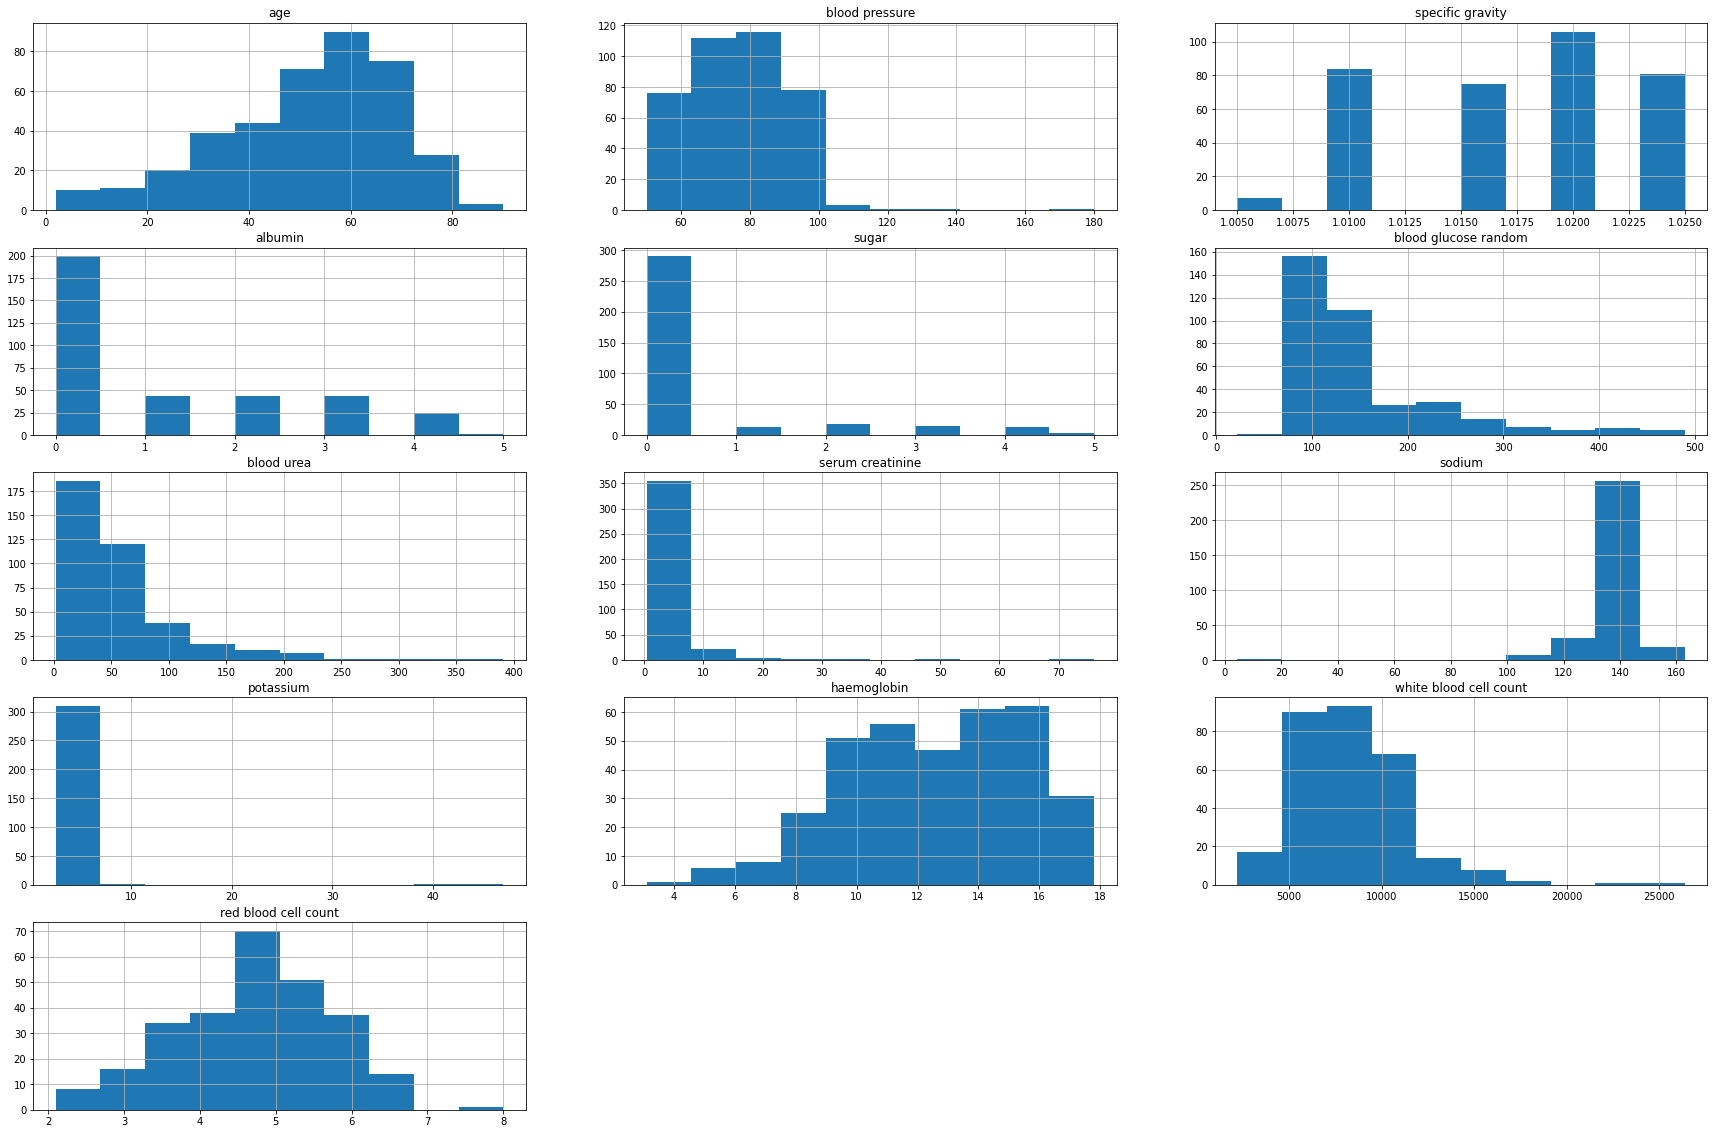

In [43]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)


#Distrubution of the Dataset    

    Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

### Now, let's check the label distribution for categorical data

In [44]:
len(cat_col)

12

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

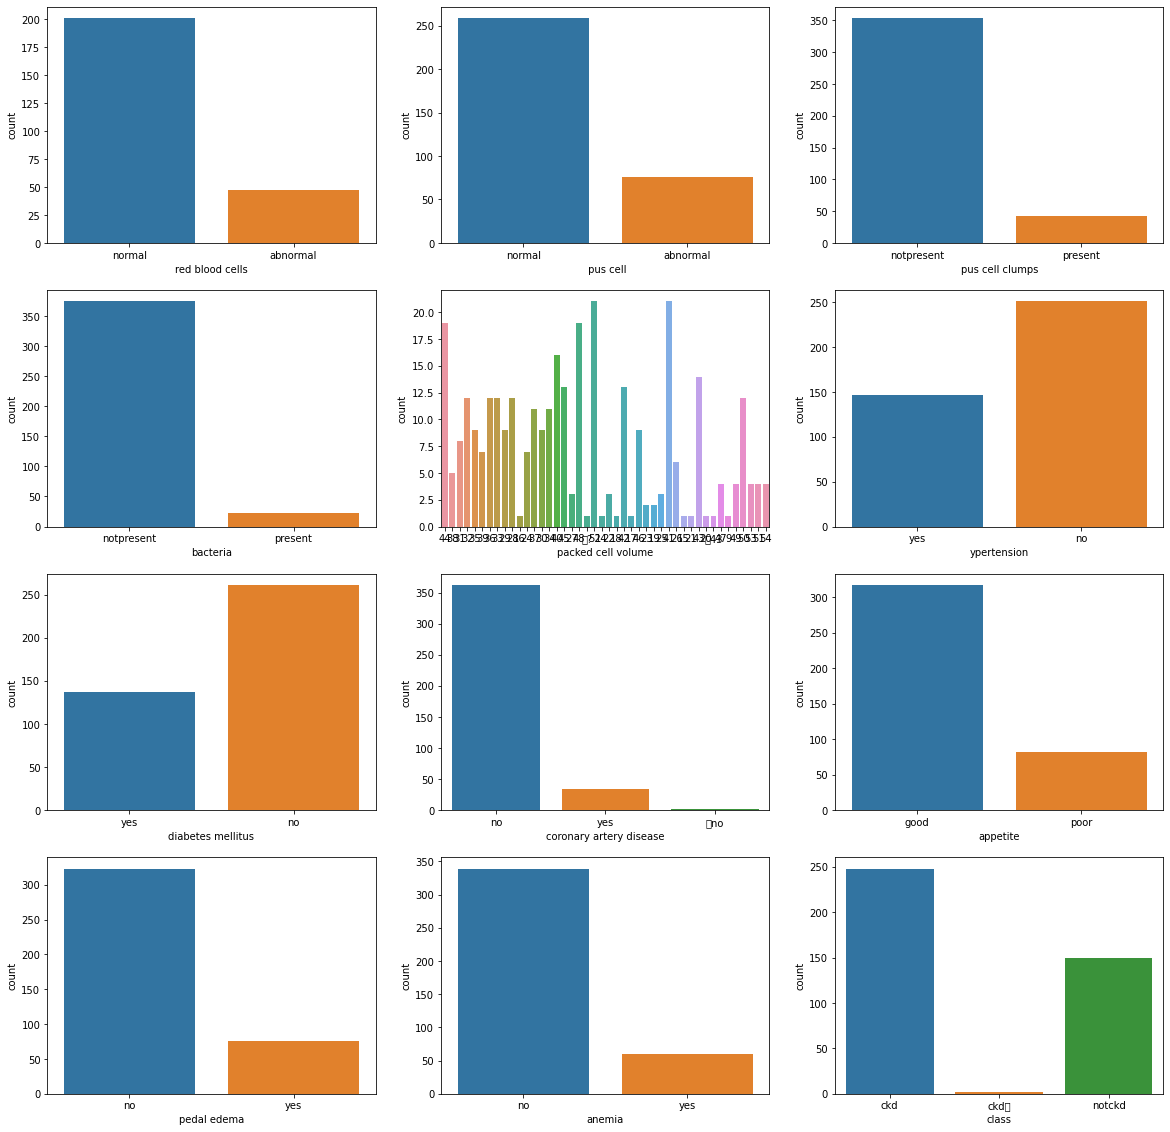

In [45]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])
    

    A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

Text(0.5, 1.0, 'target Class')

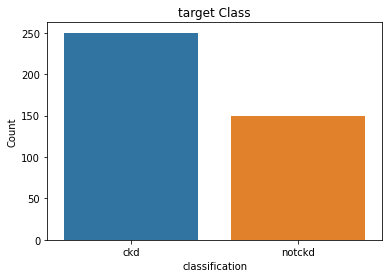

In [46]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")

In [47]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

###  7. Correlations

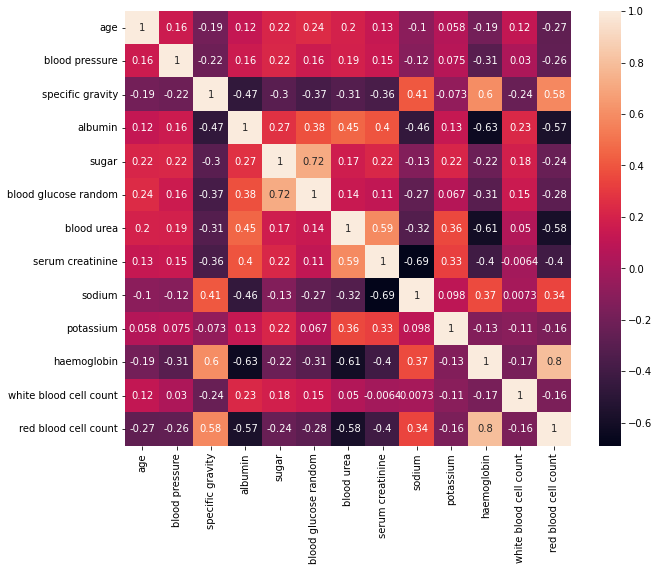

In [48]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

    Positive Correlation:
    
    Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Hemoglobin -> Red Blood cell count <- packed cell volume
    
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
    Serum creatinine -> Sodium

In [50]:
df.groupby(['red blood cells','classification'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells classification                                   
abnormal        ckd                25  3.832000     3.7  2.5  5.6
normal          ckd                40  3.782500     3.8  2.1  8.0
                notckd            134  5.368657     5.3  4.4  6.5

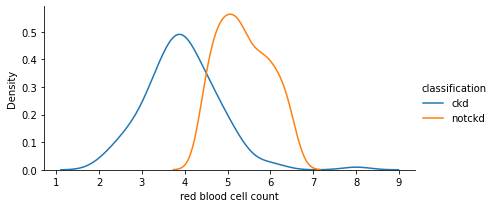

In [57]:
### analysing distribution of 'red_blood_cell_count' in both Labels 

grid=sns.FacetGrid(df, hue="classification",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

In [59]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="classification",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

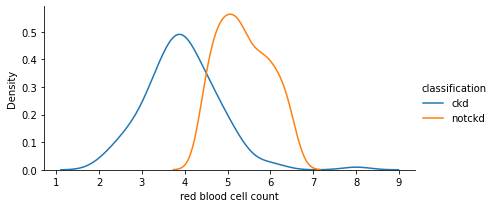

In [60]:
kde_plot('red blood cell count')

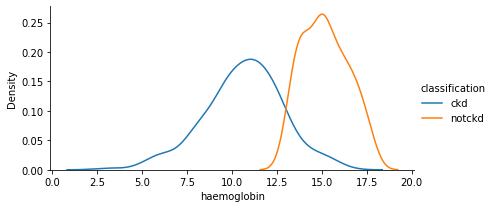

In [61]:
kde_plot('haemoglobin')

    1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
    disease(i.e ckd).
    2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
    disease(i.e nockd).

In [73]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class,coronary_artery_disease,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800.0,5.2,yes,yes,no,good,no,no,ckd,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000.0,NaN,no,no,no,good,no,no,ckd,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500.0,NaN,no,yes,no,poor,no,yes,ckd,no,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,no,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300.0,4.6,no,no,no,good,no,no,ckd,no,ckd


In [74]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          70
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
coronary_artery_disease      2
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
classification               0
dtype: int64

In [75]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'packed cell volume',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



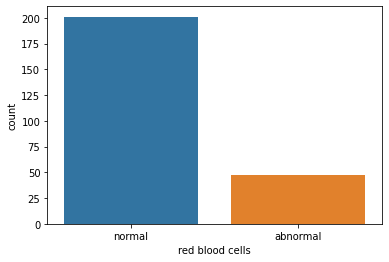

In [77]:
sns.countplot(df['red blood cells'])